<a href="https://colab.research.google.com/github/imran201khan/MachineLearning/blob/main/netflix_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1.Import Libraries**

In [32]:
pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.style.use('ggplot')
import pandas_profiling

# **2.Read Csv**

In [34]:
df=pd.read_csv("/content/Netflix subscription fee Dec-2021.csv")

In [35]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


# **3.Look The Data Types**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


**Country :**  Name Countries

**Total Library Size :** (Sum of Movies and Show) or Total itmes  in a one month plan

**No. Of TV Shows :** Totel Shows/Webseries in a one month Plan

**No. Of Movies :** Total Movies in a one month Plan

**Cost Per Month - Basic :** Basic Plan for One month

**Cost Per Month -  Standard :** Standard Plan For One month

**Cost Per Month - Premium :** Premium Plan for One month

# **4. Profilling**

**The pandas profiling library can create, in a few lines of code, a rich and interactive suite of exploratory data analysis (EDA) tables and visualizations.**

In [37]:
# profiling = pandas_profiling.ProfileReport(df,axis=1)
# profiling.to_file("profiling.html")
# profiling

# **5.Check For Missing And Duplected Values**

In [38]:
#Find  Columns of Missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [39]:
#Find Totel Missing Values in Columns
df.isnull().sum()

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [40]:
#Checking Duplicated Values
df.duplicated().sum()

0

# **6.Describe Data**

In [41]:
df.describe(include='all')

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65,65,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
unique,65,65,NaN,NaN,NaN,NaN,NaN,NaN
top,ar,Argentina,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,NaN,NaN,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,NaN,NaN,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,NaN,NaN,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,NaN,NaN,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,NaN,NaN,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000


In [42]:
df['Country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Guatemala',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova',
       'Monaco', 'Netherlands', 'New Zealand', 'Norway', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'San Marino', 'Singapore', 'Slovakia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Uruguay', 'Venezuela'], dtype=object)

# **Univariate Analysis**

In [43]:
def univariate(variable):
    color=['red','blue','yellow','green','black']
    n=np.random.randint(0,5)
    clr=color[n]
    plt.figure(figsize=(10,6))
    plt.hist(df[variable],color=clr,bins=10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

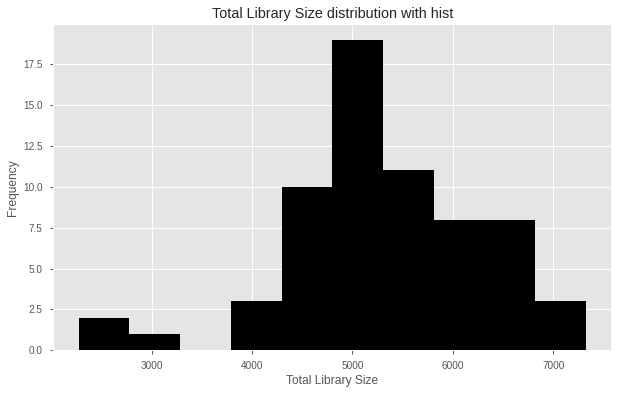

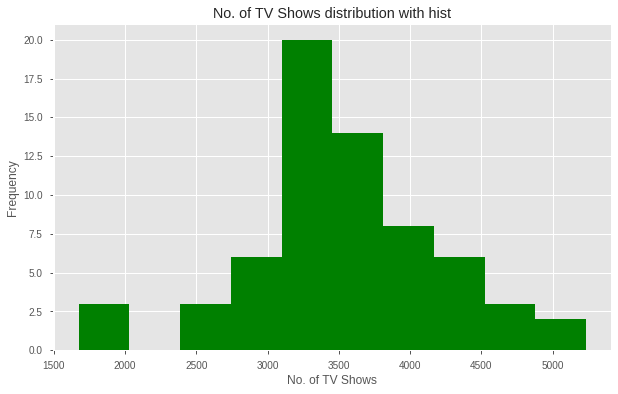

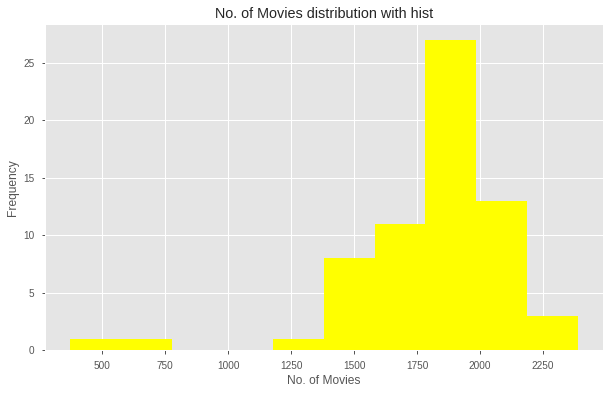

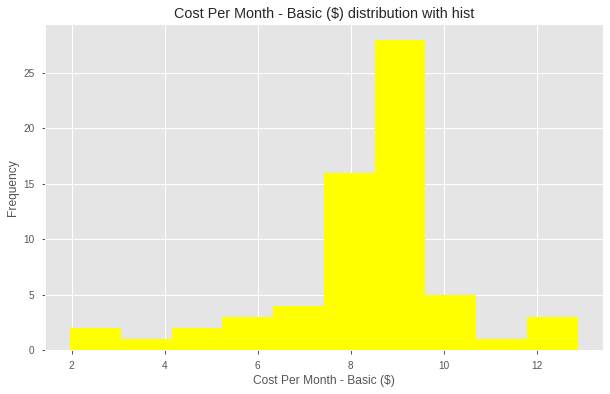

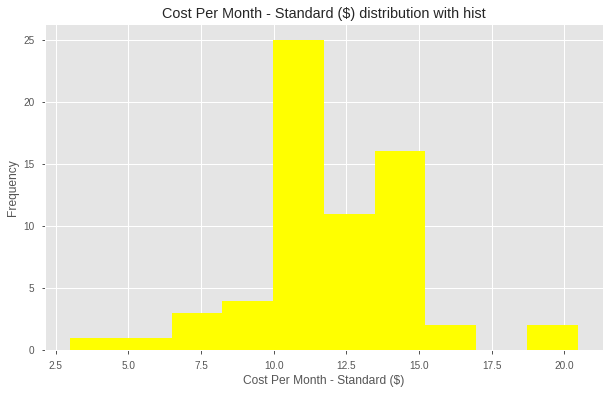

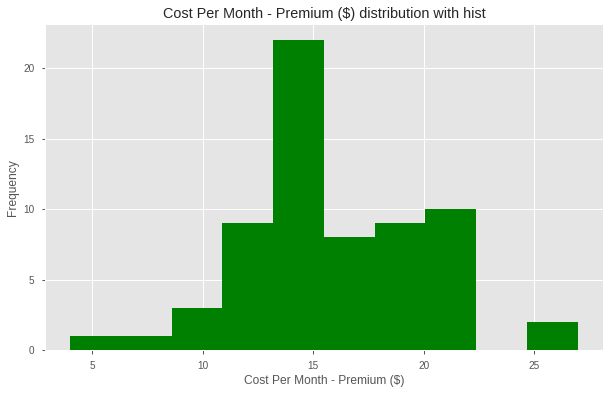

In [44]:
col=['Total Library Size', 'No. of TV Shows', 'No. of Movies',
       'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
       'Cost Per Month - Premium ($)']

for i in col:
    univariate(i)
    

In [45]:
#outlier presnt in all numrical colmns
def univariate_box(variable):
    color=['red','blue','yellow','green','black']
    n=np.random.randint(0,5)
    clr=color[n]
    plt.figure(figsize=(10,6))
    sns.boxplot(df[variable],color=clr)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

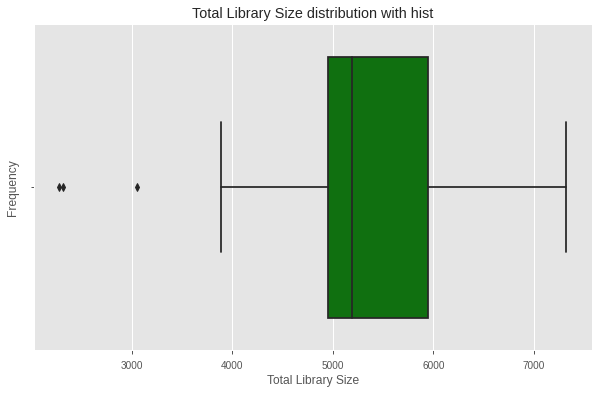

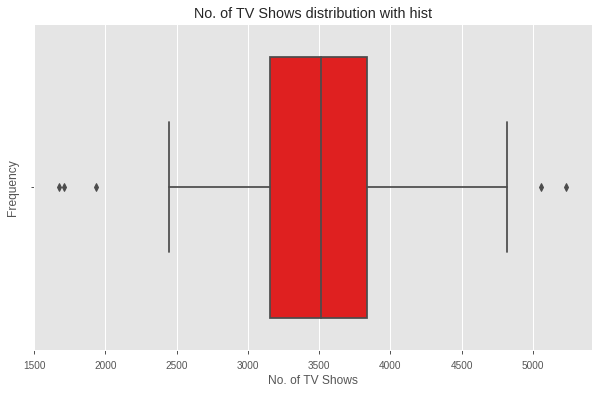

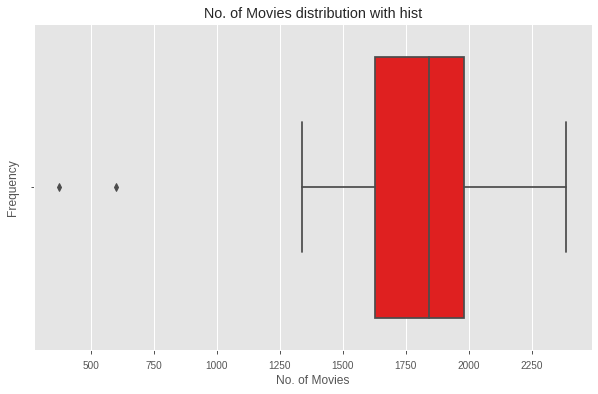

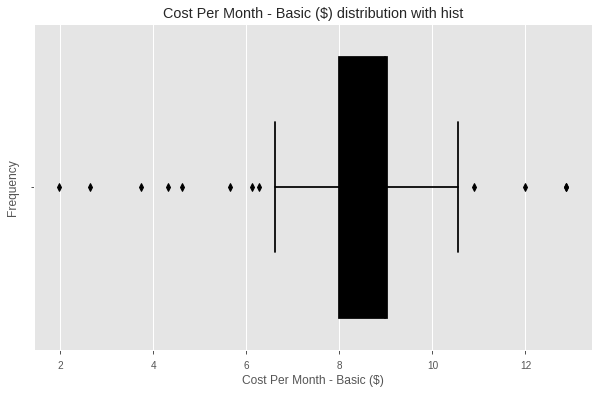

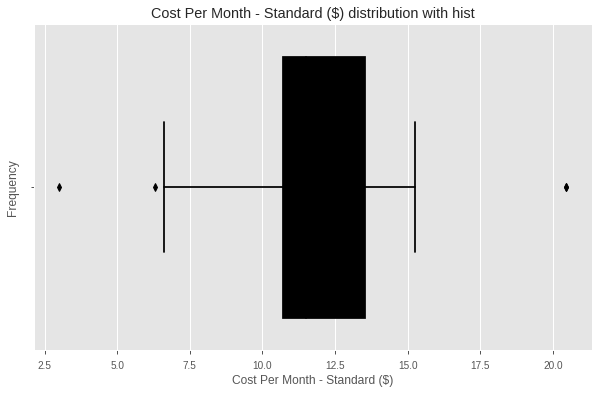

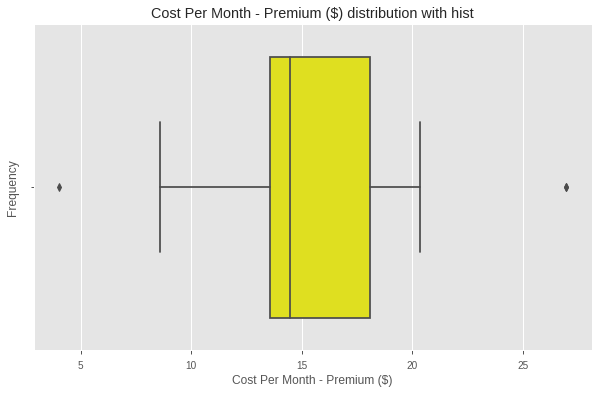

In [46]:
import warnings
warnings.filterwarnings("ignore")
for i in col:
    univariate_box(i)

# **8.Bivariate Analysis**

In [47]:
#plot scatter b/w shows,movies ,size and costs
def Scatter(var1,var2):
    plt.figure(figsize=(10,6))
    sns.scatterplot(df[var1],df[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title("{0} vs {1}".format(var1,var2))
    plt.show()

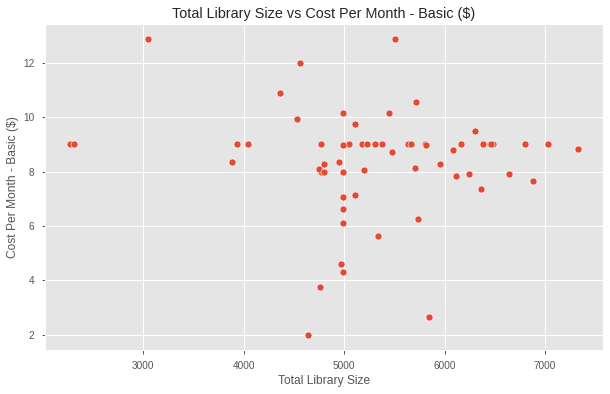

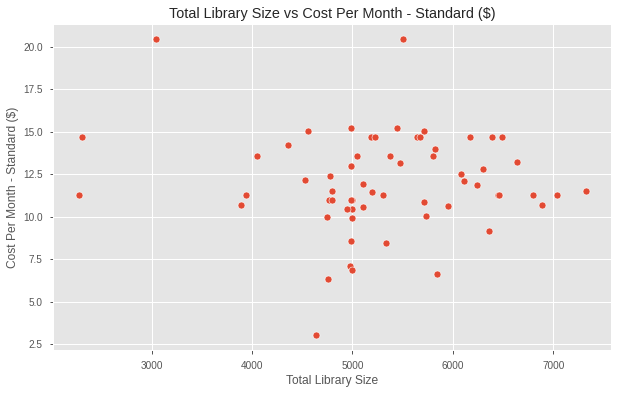

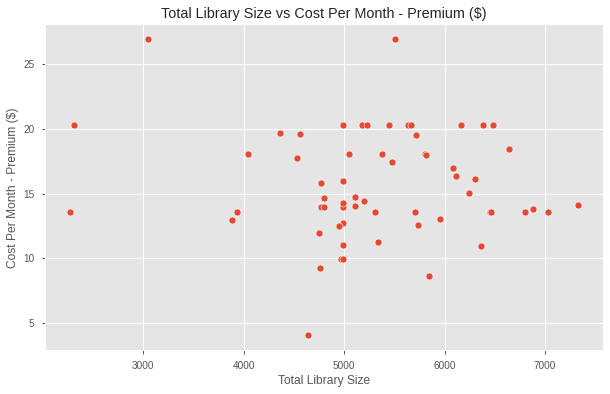

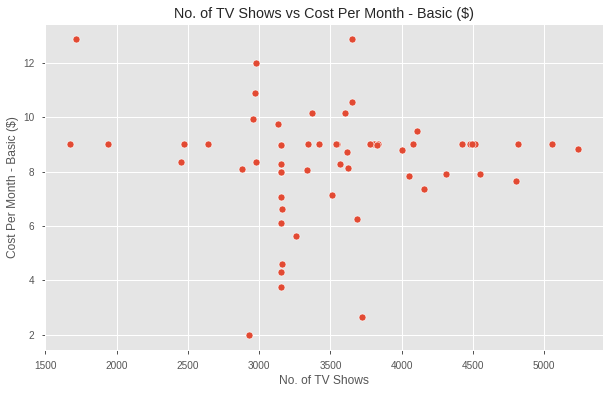

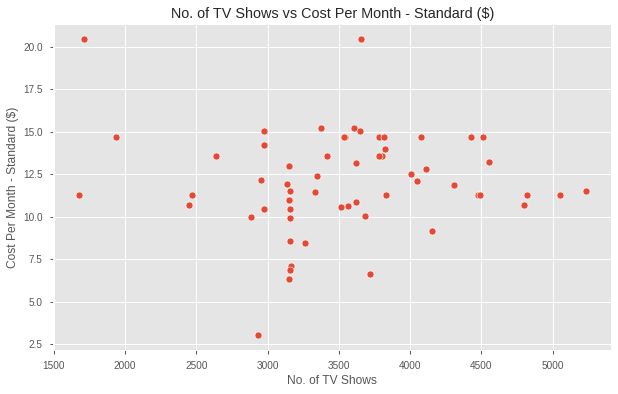

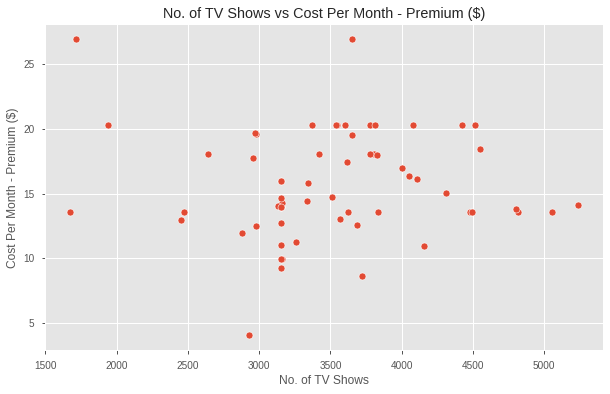

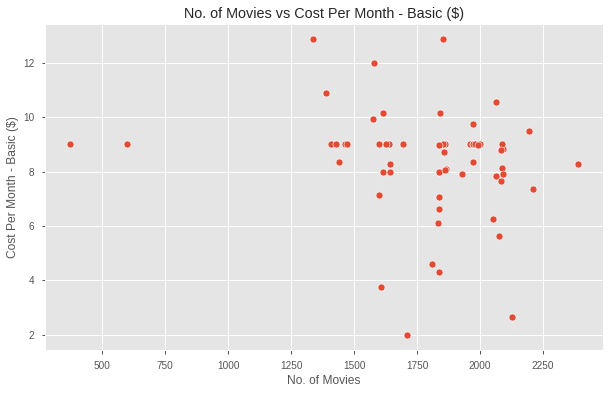

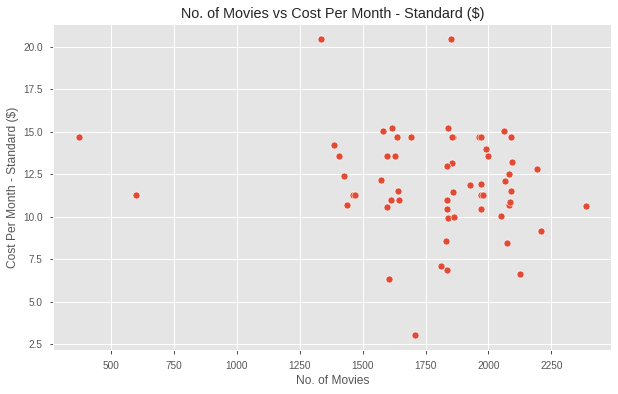

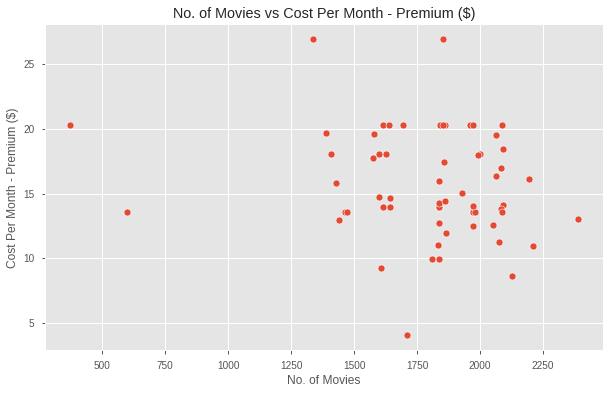

In [48]:
col1=['Total Library Size', 'No. of TV Shows', 'No. of Movies']
col2=['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
     'Cost Per Month - Premium ($)']
for i in col1:
    for j in col2:
        Scatter(i,j)

In [49]:
#plot scatter b/w shows,movies ,size and costs
def Bar(var):
    plt.figure(figsize=(10,6))
    sns.barplot(df[var],df['Country'])
    plt.ylabel("Country")
    plt.xlabel(var)
    plt.title("{0} vs {1}".format("Country",var))
    plt.show()

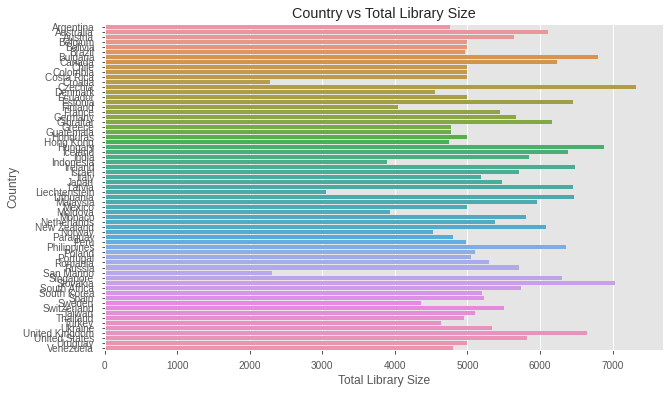

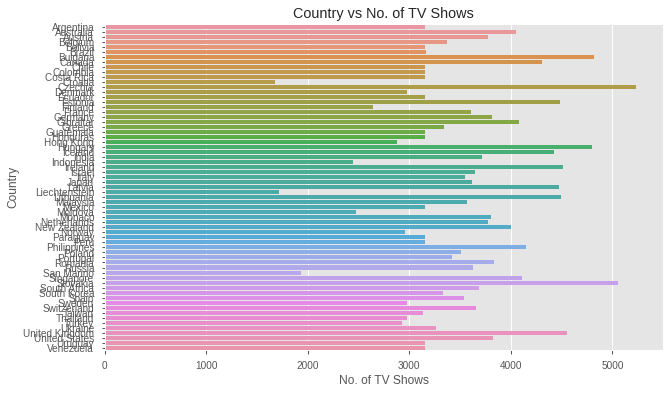

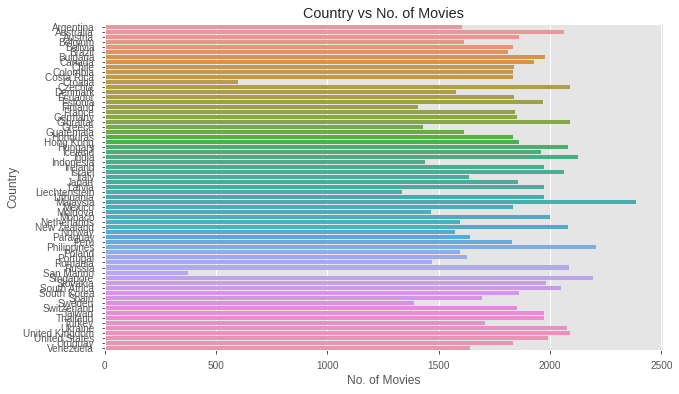

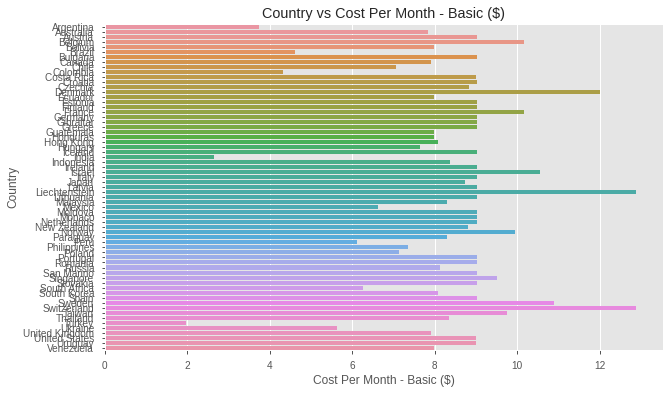

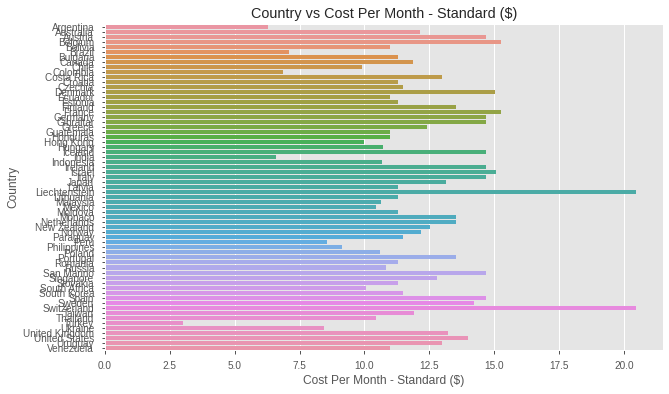

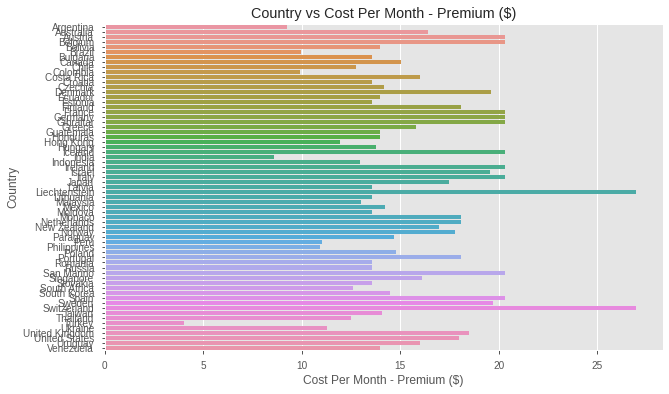

In [50]:
for i in col:
    Bar(i)
    

In [51]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


# **9.Analysis in 3d Plots**

In [52]:
#no. of shows and no. of movies  of Basic plans in every country
fig = px.scatter_3d(df, x='No. of TV Shows', y='No. of Movies', z='Cost Per Month - Basic ($)',color='Country')
fig.show()

In [53]:
#no. of shows and no. of movies  of Standard plans in every country
fig = px.scatter_3d(df, x='No. of TV Shows', y='No. of Movies', z='Cost Per Month - Standard ($)',color='Country')
fig.show()

In [54]:
#no. of shows and no. of movies  of Premium plans in every country
fig = px.scatter_3d(df, x='No. of TV Shows', y='No. of Movies', z='Cost Per Month - Premium ($)',color='Country')
fig.show()

**in these 3d  plots we can easily analyze the data :Switzerland and Liechenstein have maximum cost in all three plans and in India and Turkey have minimum cost in all three plans**

In [55]:
#all three plans cost in every company
fig = px.scatter_3d(df, x='Cost Per Month - Basic ($)', y='Cost Per Month - Standard ($)', z='Cost Per Month - Premium ($)',color='Country')
fig.show()
#linearly relationship in all plans

In [56]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
